In [1]:
%load_ext autoreload
%autoreload 2
import torch
torch.manual_seed(0) # Set seed before importing other modules
import numpy as np
np.random.seed(0)
import random
random.seed(0)
import sys
import os
from utils.get_data import get_dataloader_augmented
from utils.visualisations import pca_plot_dataloaders, pca_plot_multiclass
import torch.multiprocessing
from models.dino_vit import MultiModalViTDINOLightning, MultiModalViTDINO
from utils.get_data import get_dataloader_augmented
from training_structures.dino_train import train_downstream, train_knn_classifier 
from utils.plots_trials import create_plots_for_study
import optuna
# torch.multiprocessing.set_start_method('spawn')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
current_path = os.getcwd()
model_files_path = os.path.join(current_path, 'model_saves', 'final_multimodal_dino_vit_20250227_163413')
pca_plot_path = os.path.join(model_files_path, 'pca_plots')
plots_trials_path = os.path.join(model_files_path, 'plots_trials')
model_versions_path = os.path.join(model_files_path, 'versions')
final_model_path = os.path.join(model_files_path, 'multimodal_dino_vit.ckpt')
best_model_path = os.path.join(model_files_path, 'epoch=22-step=79074.ckpt')
sys.path.append(current_path)

c:\Users\Ward\anaconda3\envs\multibench\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
module = MultiModalViTDINOLightning.load_from_checkpoint(best_model_path)
pretrained_dino : MultiModalViTDINO = module.model

In [3]:
traindata, validdata, testdata = get_dataloader_augmented(f'{current_path}/data/avmnist', type="burst_noise", batch_size=128, num_workers=0)
knn_model, knn_accuracy = train_knn_classifier(pretrained_dino, traindata, testdata, n_neighbors=5)

Extracting training features...
Extracting test features...
Training KNN classifier...
KNN Accuracy (k=5): 0.5984


In [4]:
classifier = train_downstream(
    pretrained_dino,
    traindata,
    validdata,
    testdata,
    num_epochs=10,
    device=device,
    save_path='model_saves/dino_vit/downstream/downstream_model.pt',
    train_log_path='training_logs/dino_vit/downstream/downstream_train_log.csv',
    test_log_path='test_logs/dino_vit/downstream/downstream_test_log.csv'
)

Epoch 1/10: 100%|██████████| 430/430 [00:15<00:00, 28.23it/s, loss=1.24] 


Epoch 1: Train Loss: 1.2173, Val Loss: 0.9938, Val Acc: 60.44%
Saved best model with validation accuracy: 60.44%


Epoch 2/10: 100%|██████████| 430/430 [00:14<00:00, 29.14it/s, loss=0.927]


Epoch 2: Train Loss: 1.0430, Val Loss: 0.9735, Val Acc: 61.62%
Saved best model with validation accuracy: 61.62%


Epoch 3/10: 100%|██████████| 430/430 [00:16<00:00, 26.68it/s, loss=1.12] 


Epoch 3: Train Loss: 1.0226, Val Loss: 0.9658, Val Acc: 62.38%
Saved best model with validation accuracy: 62.38%


Epoch 4/10: 100%|██████████| 430/430 [00:15<00:00, 27.52it/s, loss=0.952]


Epoch 4: Train Loss: 1.0129, Val Loss: 0.9553, Val Acc: 62.92%
Saved best model with validation accuracy: 62.92%


Epoch 5/10: 100%|██████████| 430/430 [00:16<00:00, 25.57it/s, loss=0.977]


Epoch 5: Train Loss: 1.0015, Val Loss: 0.9534, Val Acc: 61.88%


Epoch 6/10: 100%|██████████| 430/430 [00:16<00:00, 25.48it/s, loss=1.25] 


Epoch 6: Train Loss: 0.9971, Val Loss: 0.9453, Val Acc: 62.96%
Saved best model with validation accuracy: 62.96%


Epoch 7/10: 100%|██████████| 430/430 [00:17<00:00, 24.64it/s, loss=1.05] 


Epoch 7: Train Loss: 0.9914, Val Loss: 0.9433, Val Acc: 62.82%


Epoch 8/10: 100%|██████████| 430/430 [00:16<00:00, 25.42it/s, loss=0.778]


Epoch 8: Train Loss: 0.9883, Val Loss: 0.9416, Val Acc: 62.88%


Epoch 9/10: 100%|██████████| 430/430 [00:17<00:00, 24.56it/s, loss=0.962]


Epoch 9: Train Loss: 0.9852, Val Loss: 0.9400, Val Acc: 62.96%


Epoch 10/10: 100%|██████████| 430/430 [00:17<00:00, 24.42it/s, loss=1.03] 


Epoch 10: Train Loss: 0.9839, Val Loss: 0.9399, Val Acc: 62.92%


c:\Users\Ward\Desktop\vub-github\Thesis-project\AVMNIST_Experiments\training_structures\dino_train.py:217: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.l


Test Accuracy: 62.17%


100%|██████████| 79/79 [00:01<00:00, 76.92it/s]


Selected digits for visualization: [9, 8]


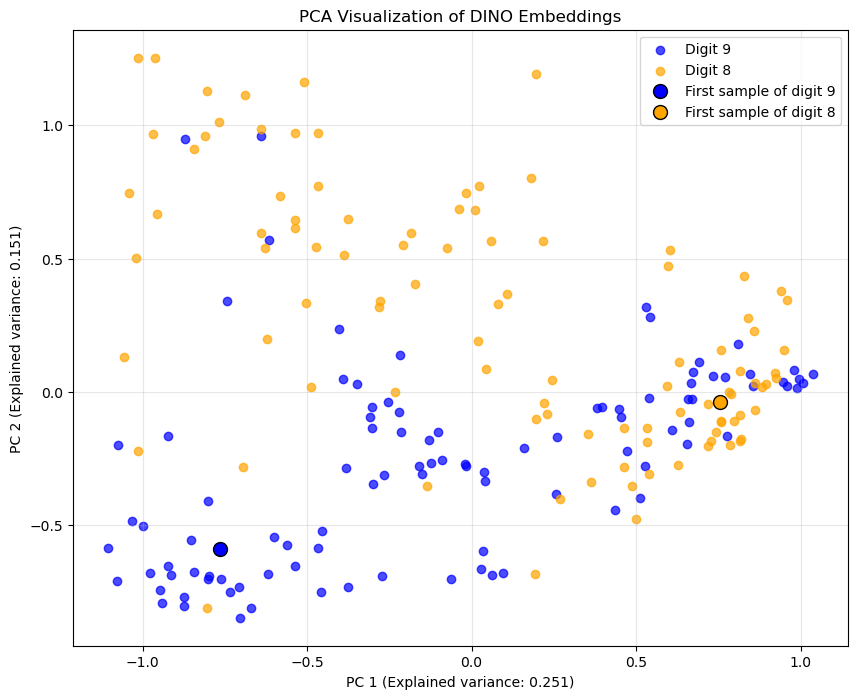

In [5]:
_ = pca_plot_dataloaders(pretrained_dino, testdata, selected_digits=[9, 8], dirpath=pca_plot_path)

100%|██████████| 79/79 [00:01<00:00, 68.70it/s]


Visualizing digits: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


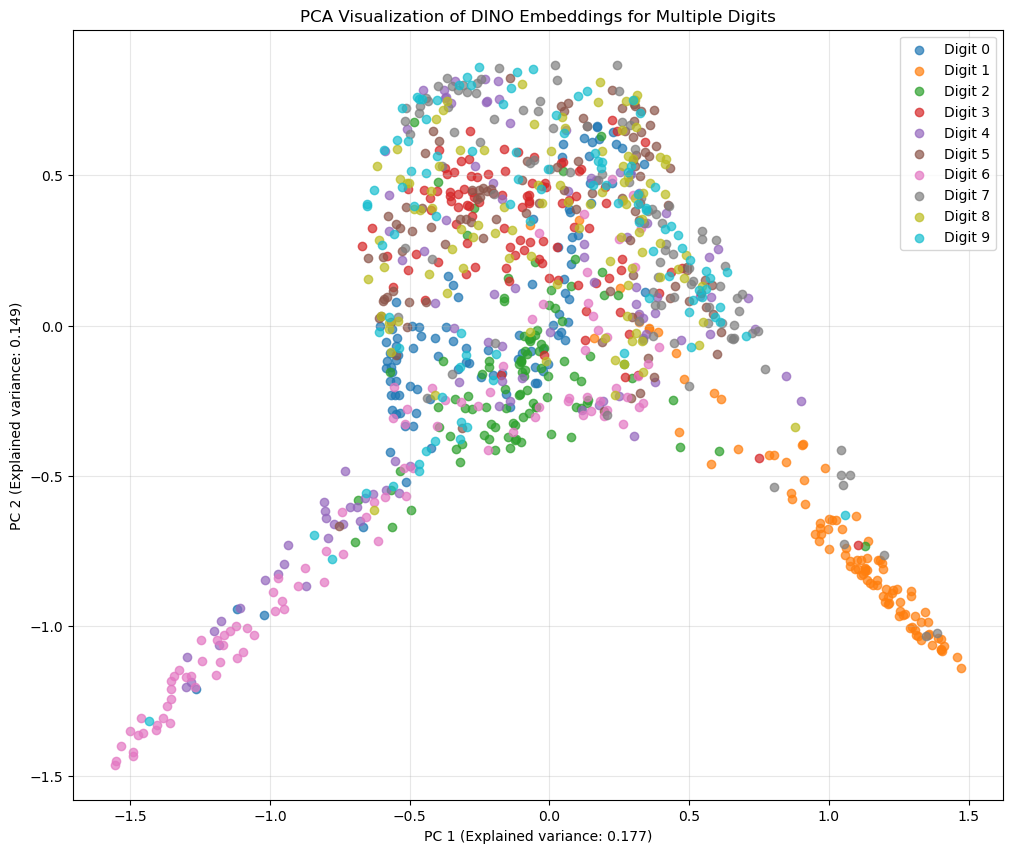

In [6]:
_ = pca_plot_multiclass(pretrained_dino, testdata, selected_digits=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dirpath=pca_plot_path)

Error creating Optuna plots: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
All plots created and saved to c:\Users\Ward\Desktop\vub-github\Thesis-project\AVMNIST_Experiments\model_saves\final_multimodal_dino_vit_20250227_163413\plots_trials


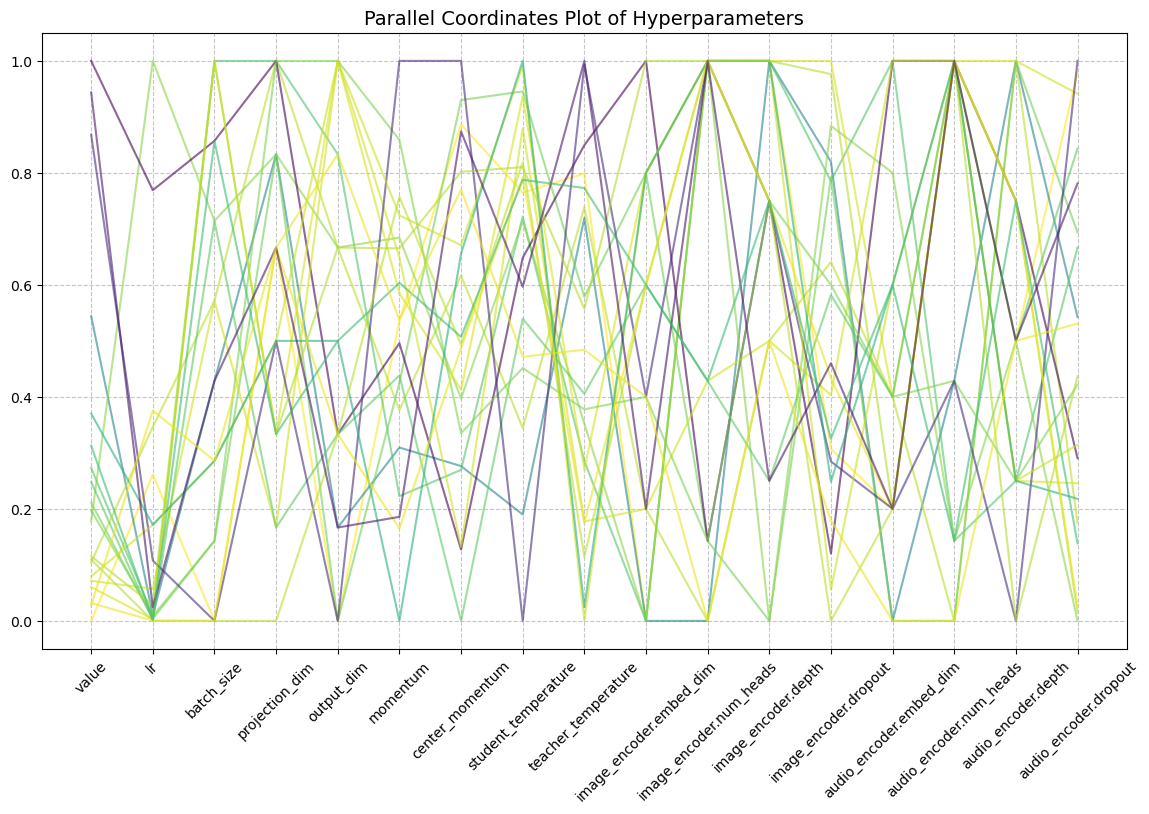

In [7]:
loaded_study = optuna.load_study(study_name="multimodal_dino_vit", storage=f"sqlite:///{model_files_path}/studies.db")
create_plots_for_study(loaded_study, versions_path=model_versions_path, plots_path=plots_trials_path)